In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import os
from google.colab import files
import pywt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/full_df_samp.csv')

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/full_df_train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/full_df_test.csv')

In [ ]:
train.shape, test.shape

((79069, 722), (30272, 722))

In [ ]:
#df.shape

(11000, 722)

In [ ]:
#df = df.drop(['Unnamed: 0'], axis=1)
train = train.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

In [ ]:
#df.shape
print(train.shape, test.shape)

(79069, 721) (30272, 721)


In [ ]:
# The first element contains the labels
#Y_all = df.values[:, 0]

# The other data points are the electrocadriogram data
#X_all =  df.values[:, 1:]

# The first element contains the labels
y_train = train.values[:, 0]
y_test = test.values[:, 0]

# The other data points are the electrocadriogram data
X_train =  train.values[:, 1:]
X_test =  test.values[:, 1:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(79069, 720) (79069,) (30272, 720) (30272,)


In [ ]:
from sklearn.model_selection import train_test_split
train_data1, train_data2, train_labels1, train_labels2 = train_test_split(
    X_train, y_train, test_size=0.5, random_state=21)

In [ ]:
from sklearn.model_selection import train_test_split
test_data1, test_data2, test_labels1, test_labels2 = train_test_split(
    X_test, y_test, test_size=0.5, random_state=21)

In [ ]:
#train_data.shape, train_labels.shape, test_data.shape, test_labels.shape
train_data1.shape, train_labels1.shape, test_data1.shape, test_labels1.shape

((39534, 720), (39534,), (15136, 720), (15136,))

In [ ]:
train_data_ab = train_data1.reshape(39534, 720,1)
test_data_ab = test_data1.reshape(15136,720,1)
train_data_ab.shape, test_data_ab.shape

((39534, 720, 1), (15136, 720, 1))

In [ ]:
#test_data_ab.shape

In [ ]:
#train_labels_ab = train_labels.reshape(8800,1)
#test_labels_ab = test_labels.reshape(2200,1)

#train_labels_ab.shape, test_labels_ab.shape

train_labels_ab = train_labels1.reshape(39534,1)
test_labels_ab = test_labels1.reshape(15136,1)

train_labels_ab.shape, test_labels_ab.shape

((39534, 1), (15136, 1))

In [ ]:
pd.DataFrame(test_labels_ab).value_counts()

0.0    12249
1.0     2887
dtype: int64

In [ ]:
#n_timesteps, n_features, n_outputs = train_data_ab.shape[1], train_data_ab.shape[2], train_labels_ab.shape[1]
#n_timesteps, n_features, n_outputs

n_timesteps, n_features, n_outputs = train_data_ab.shape[1], train_data_ab.shape[2], train_labels_ab.shape[1]
n_timesteps, n_features, n_outputs

(720, 1, 1)

In [ ]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.utils.np_utils import to_categorical

In [ ]:
# lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot
from keras.callbacks import History 

In [ ]:
from keras.layers import Bidirectional, LSTM

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(train_data_ab.shape[1], train_data_ab.shape[2]))))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(
                loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data_ab, train_labels_ab, batch_size = 32, epochs=50, verbose = 1, validation_data=(test_data_ab, test_labels_ab)) 
#history = model.fit(train_data_ab, train_labels_ab, batch_size = 32, epochs=10, verbose = 1, validation_split = 0.1) 
train_score = model.evaluate(train_data_ab, train_labels_ab, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(test_data_ab, test_labels_ab, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

Epoch 1/50
1236/1236 [==============================] - 71s 57ms/step - loss: 0.6357 - accuracy: 0.6577 - val_loss: 0.5424 - val_accuracy: 0.7737
Epoch 2/50
1236/1236 [==============================] - 69s 56ms/step - loss: 0.6298 - accuracy: 0.6607 - val_loss: 0.5375 - val_accuracy: 0.7981
Epoch 3/50
1236/1236 [==============================] - 69s 56ms/step - loss: 0.6358 - accuracy: 0.6557 - val_loss: 0.5373 - val_accuracy: 0.8001
Epoch 4/50
1236/1236 [==============================] - 62s 51ms/step - loss: 0.6259 - accuracy: 0.6744 - val_loss: 0.5254 - val_accuracy: 0.7856
Epoch 5/50
1236/1236 [==============================] - 62s 50ms/step - loss: 0.6412 - accuracy: 0.6450 - val_loss: 0.5516 - val_accuracy: 0.8088
Epoch 6/50
1236/1236 [==============================] - 60s 49ms/step - loss: 0.6485 - accuracy: 0.6383 - val_loss: 0.5477 - val_accuracy: 0.8079
Epoch 7/50
1236/1236 [==============================] - 60s 49ms/step - loss: 0.6447 - accuracy: 0.6462 - val_loss: 0.5441 -

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


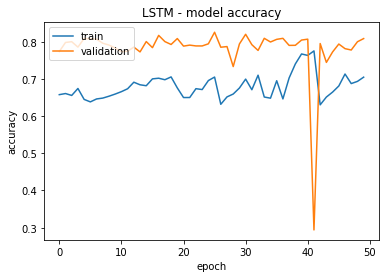

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM - model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

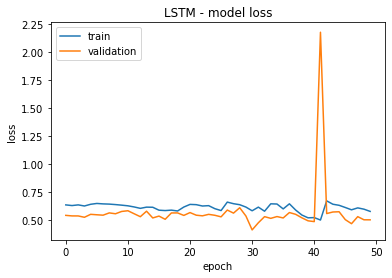

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM - model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [ ]:

# predict probabilities for test set
yhat_probs = model.predict(test_data_ab, verbose=0)
# predict crisp classes for test set
yhat_classes = (model.predict(test_data_ab) > 0.5).astype("int32")

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels_ab, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels_ab, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels_ab, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels_ab, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.808536
Precision: 0.496983
Recall: 0.313821
F1 score: 0.384713


In [ ]:
# kappa
kappa = cohen_kappa_score(test_labels_ab, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_labels_ab, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test_labels_ab, yhat_classes)
print(matrix)

Cohens kappa: 0.278130
ROC AUC: 0.703051
[[11332   917]
 [ 1981   906]]


In [ ]:
pd.DataFrame(matrix)

,0,1
0,11332,917
1,1981,906


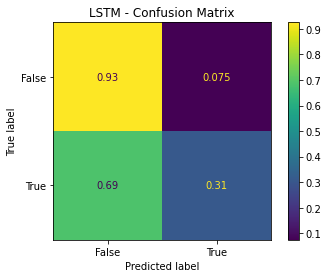

In [ ]:
from sklearn import metrics
import seaborn as sns

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])

cm_display.plot()
plt.title("LSTM - Confusion Matrix")
plt.show()


In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 128)              33792     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33,921
Trainable params: 33,921
Non-trainable params: 0
_________________________________________________________________
None


### Visual interpretation

In [ ]:
# recordings with the highest predicted probabilities
highest = np.where(yhat_probs >= np.quantile(yhat_probs, 0.9999))
highest

(array([4305, 4649]), array([0, 0]))

In [ ]:
# recordings with the lowest predicted probabilities
lowest = np.where(yhat_probs <= np.quantile(yhat_probs, 0.0001))[0]
lowest

array([8243, 9825])

Text(0.5, 1.0, 'LSTM - ECG recording for higher predicted probability')

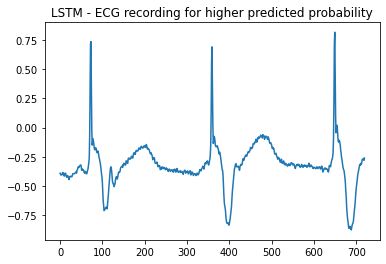

In [ ]:
plt.plot(X_test[4649,:])
plt.title("LSTM - ECG recording for higher predicted probability")
#highest[1]

In [ ]:
print(y_test[4649], y_test[8243])

0.0 0.0


Text(0.5, 1.0, 'LSTM - ECG recording for lowest predicted probability')

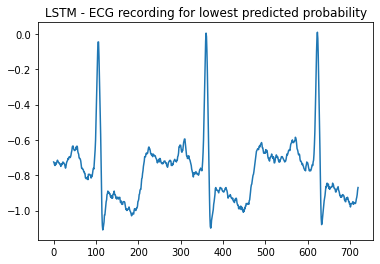

In [ ]:
#lowest 
plt.plot(X_test[8243,:])
plt.title("LSTM - ECG recording for lowest predicted probability")

In [ ]:
y_test[9825]

0.0

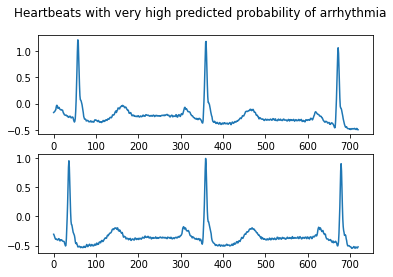

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Heartbeats with very high predicted probability of arrhythmia')
ax1.plot(X_test[highest[1],:])
ax2.plot(X_test[highest[2],:])


In [ ]:
test_labels_ab[highest[1]],test_labels_ab[highest[2]]
# both are abnormal

(array([0.]), array([0.]))

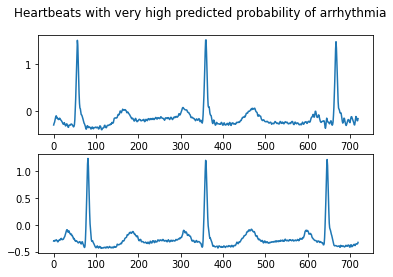

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Heartbeats with very high predicted probability of arrhythmia')
ax1.plot(X_test[highest[3],:])
ax2.plot(X_test[highest[4],:])

In [ ]:
test_labels_ab[highest[3]],test_labels_ab[highest[4]]
# both are abnormal

(array([0.]), array([1.]))

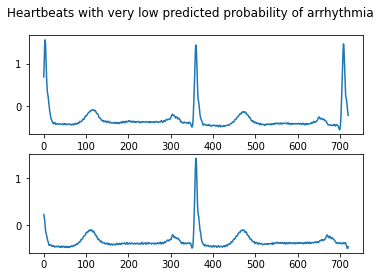

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Heartbeats with very low predicted probability of arrhythmia')
ax1.plot(X_test[lowest[1],:])
ax2.plot(X_test[lowest[2],:])

In [ ]:
test_labels_ab[lowest[1]],test_labels_ab[lowest[2]]
# both are normal

(array([0.]), array([0.]))

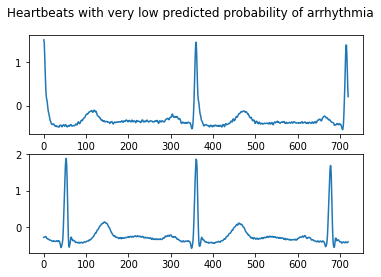

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Heartbeats with very low predicted probability of arrhythmia')
ax1.plot(X_test[lowest[3],:])
ax2.plot(X_test[lowest[4],:])

In [ ]:
test_labels_ab[lowest[3]], test_labels_ab[lowest[4]]
# both are normal

(array([0.]), array([0.]))

In [ ]:
### VISUAL INTERPRETATION
# recordings with the highest predicted probabilities
highest = np.where(yhat_probs >= np.quantile(yhat_probs,.99999))[0]
highest
X_test[highest,:]

plt.plot(X_test[highest[1],:])
highest[1]

#recordings with the lowest predicted probabilities
lowest = np.where(yhat_probs <= np.quantile(yhat_probs,.001))[0]
test_labels_ab[lowest[2]]

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Heartbeats with very high predicted probability of arrhythmia')
ax1.plot(X_test[highest[1],:])
ax2.plot(X_test[highest[2],:])

test_labels_ab[highest[1]],test_labels_ab[highest[2]]
# both are abnormal

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Heartbeats with very high predicted probability of arrhythmia')
ax1.plot(X_test[highest[3],:])
ax2.plot(X_test[highest[4],:])

test_labels_ab[highest[3]],test_labels_ab[highest[4]]
# both are abnormal

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Heartbeats with very low predicted probability of arrhythmia')
ax1.plot(X_test[lowest[1],:])
ax2.plot(X_test[lowest[2],:])

test_labels_ab[lowest[1]],test_labels_ab[lowest[2]]
# both are normal

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Heartbeats with very low predicted probability of arrhythmia')
ax1.plot(X_test[lowest[3],:])
ax2.plot(X_test[lowest[4],:])

test_labels_ab[lowest[3]], test_labels_ab[lowest[4]]
# both are normal

IndexError: ignored